In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
train = pd.read_csv("train.csv", index_col="id")
test = pd.read_csv("test.csv", index_col="id")
train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
id,,,,,,,,,,,,,,
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [9]:
train.describe().T[["count","mean","50%","std","min","max"]].round({"mean":3,"std":3})

,count,mean,50%,std,min,max
Age,630000.0,54.137,54.0,8.256,29.0,77.0
Sex,630000.0,0.715,1.0,0.452,0.0,1.0
Chest pain type,630000.0,3.313,4.0,0.852,1.0,4.0
BP,630000.0,130.497,130.0,14.976,94.0,200.0
Cholesterol,630000.0,245.012,243.0,33.682,126.0,564.0
FBS over 120,630000.0,0.080,0.0,0.271,0.0,1.0
EKG results,630000.0,0.982,0.0,0.999,0.0,2.0
Max HR,630000.0,152.817,157.0,19.113,71.0,202.0
Exercise angina,630000.0,0.274,0.0,0.446,0.0,1.0
ST depression,630000.0,0.716,0.1,0.948,0.0,6.2


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  object 
dtypes: float6

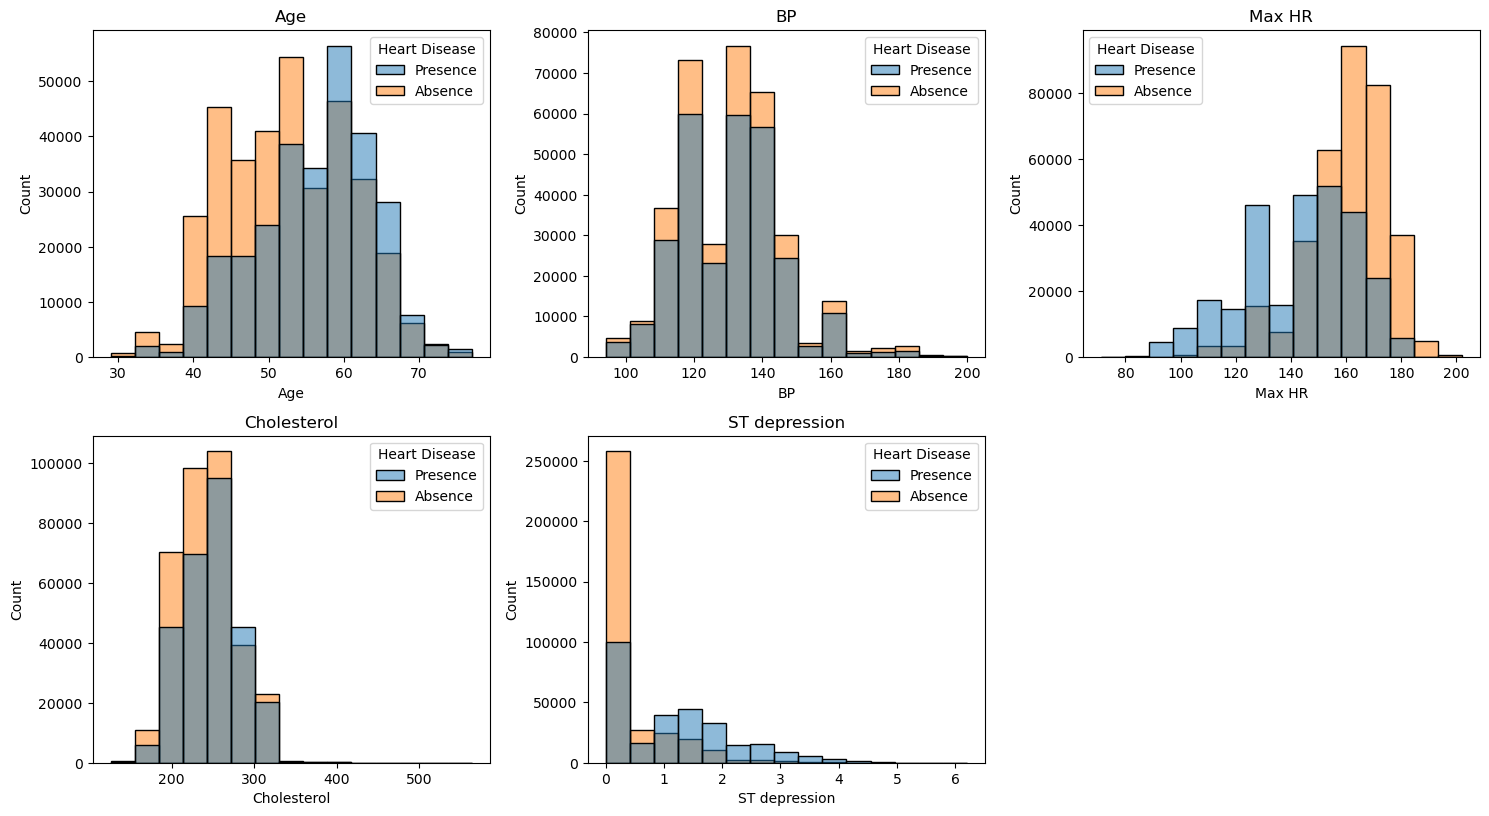

In [29]:
X_columns = ["Age","BP","Max HR","Cholesterol","ST depression"]

rows, cols = 5, 3
plt.figure(figsize=(15, 20))

for i, col in enumerate(X_columns[:rows*cols]):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(
        data=train,
        x=col,
        hue="Heart Disease",
        bins=15
    )
    plt.title(col)

plt.tight_layout()
plt.show()


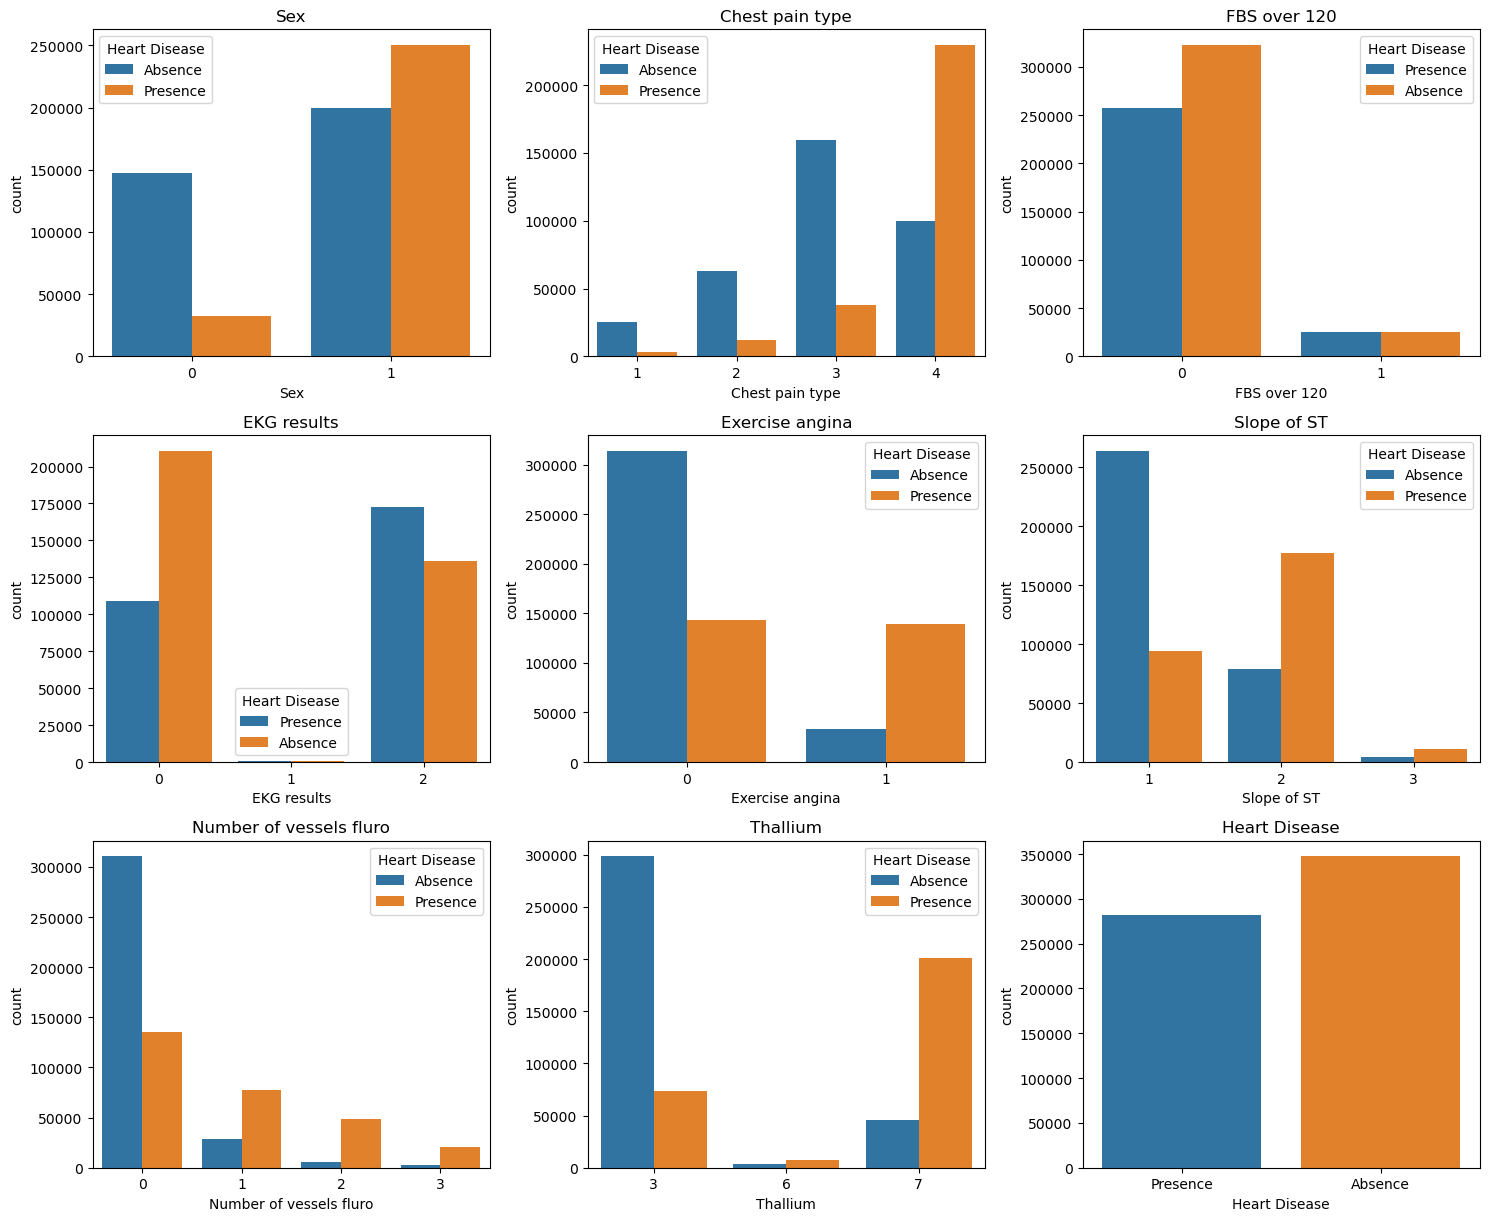

In [31]:
X_columns = train.drop(columns=["Age","BP","Max HR","Cholesterol","ST depression"]).columns

rows, cols = 5, 3
plt.figure(figsize=(15, 20))

for i, col in enumerate(X_columns[:rows*cols]):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(
        data=train,
        x=col,
        hue="Heart Disease",
    )
    plt.title(col)

plt.tight_layout()
plt.show()
